# Support Vector Machines

In [1]:
# Import Pertinent Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Import Iris data from Sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Check out the keys from iris data set
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Get more information on data
print(iris['DESCR'])

# Create a Dataframe for both data and target
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
flowers = {0:'setosa', 1:'versicolor', 2:'virginica'} # Shows what target column is regarding to flowers
target = pd.DataFrame(iris['target'], columns=['flower type'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
target = target['flower type'].map(flowers)

In [6]:
# Combine data for some exploritory analysis
combin = pd.concat([df_iris, target], axis=1)
combin.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


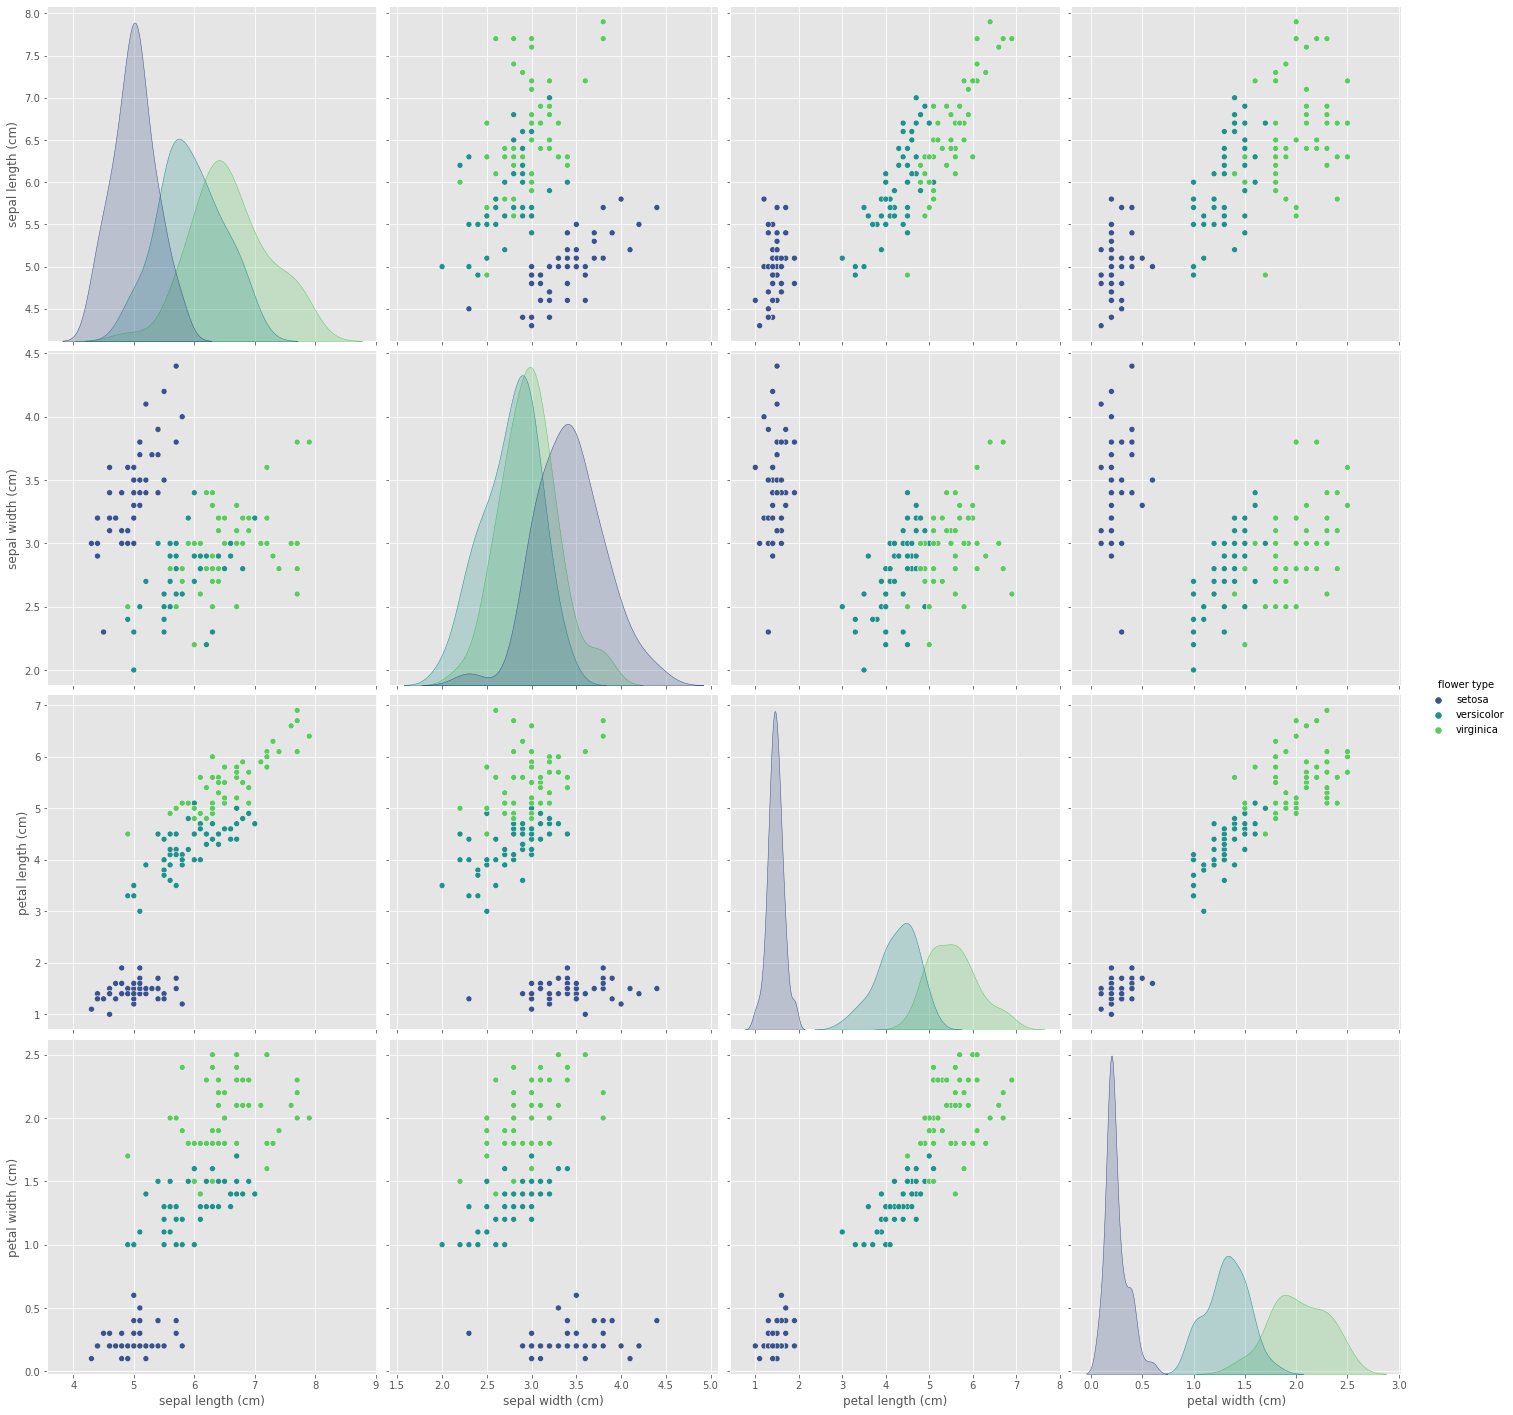

In [7]:
sns.pairplot(combin, hue='flower type', height=5, palette='viridis')

Text(0.5, 1.0, 'Setosa - Sepal Length vs Sepal Width')

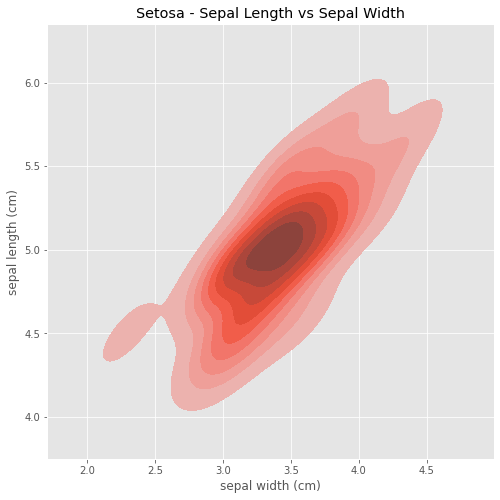

In [8]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=combin[combin['flower type'] == 'setosa'], x='sepal width (cm)', y='sepal length (cm)', fill=True)
plt.title('Setosa - Sepal Length vs Sepal Width')

In [9]:
# Split data to train and test
from sklearn.model_selection import train_test_split
X = df_iris
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [10]:
# Import SVM model
from sklearn.svm import SVC

In [11]:
# Create an instance
model = SVC(gamma='auto')

# Fit model
model.fit(X_train, y_train)

# Store predictions
predictions = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[14  0  0]
 [ 0 12  0]
 [ 0  1 18]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

